In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import train_test_split
%matplotlib inline


features_df =pd.read_csv("/content/drive/MyDrive/CIND830_Fall Semester/Features data set.csv")
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [4]:
features_df.shape

(8190, 12)

In [5]:
print(f'Temperature: {features_df.Temperature.count()}')
print(f'Markdown1: {features_df.MarkDown1.count()}')
print(f'Markdown2: {features_df.MarkDown2.count()}')
print(f'Markdown3: {features_df.MarkDown3.count()}')
print(f'Markdown4: {features_df.MarkDown4.count()}')
print(f'Markdown5: {features_df.MarkDown5.count()}')

Temperature: 8190
Markdown1: 4032
Markdown2: 2921
Markdown3: 3613
Markdown4: 3464
Markdown5: 4050


In [6]:
print(f'Store: {features_df.Store.nunique()}')
print(f'Temperature: {features_df.Temperature.nunique()}')

Store: 45
Temperature: 4178


In [7]:
print(f'Store: {features_df.Store.dtype}')
print(f'Temperature: {features_df.Temperature.dtype}')
print(f'Fuel price: {features_df.Fuel_Price.dtype}')
print(f'CPI: {features_df.CPI.dtype}')
print(f'Unemployment: {features_df.Unemployment.dtype}')

Store: int64
Temperature: float64
Fuel price: float64
CPI: float64
Unemployment: float64


In [8]:
print(f'Minimum:{features_df.Temperature.min()}')
print(f'Maximum:{features_df.Temperature.max()}')
print(f'First Quantile: {features_df.Temperature.quantile(0.25)}')
print(f'Second Quantile: {features_df.Temperature.quantile(0.50)}')
print(f'Third Quantile: {features_df.Temperature.quantile(0.75)}')
print(f'Mean: {features_df.Temperature.mean()}')
print(f'Median: {features_df.Temperature.median()}')
print(f'Mode: {features_df.Temperature.mode()}')
print(f'Standard Deviation: {features_df.Temperature.std()}')

Minimum:-7.29
Maximum:101.95
First Quantile: 45.902499999999996
Second Quantile: 60.71
Third Quantile: 73.88
Mean: 59.356197802197805
Median: 60.71
Mode: 0    50.43
1    70.28
dtype: float64
Standard Deviation: 18.67860684890715


In [9]:
print(f'Minimum:{features_df.Fuel_Price.min()}')
print(f'Maximum:{features_df.Fuel_Price.max()}')
print(f'First Quantile: {features_df.Fuel_Price.quantile(0.25)}')
print(f'Second Quantile: {features_df.Fuel_Price.quantile(0.50)}')
print(f'Third Quantile: {features_df.Fuel_Price.quantile(0.75)}')
print(f'Mean: {features_df.Fuel_Price.mean()}')
print(f'Median: {features_df.Fuel_Price.median()}')
print(f'Mode: {features_df.Fuel_Price.mode()}')
print(f'Standard Deviation: {features_df.Fuel_Price.std()}')

Minimum:2.472
Maximum:4.468
First Quantile: 3.041
Second Quantile: 3.513
Third Quantile: 3.743
Mean: 3.405991819291819
Median: 3.513
Mode: 0    3.417
1    3.638
dtype: float64
Standard Deviation: 0.43133657110071344


In [10]:
sales_df = pd.read_csv("/content/drive/MyDrive/CIND830_Fall Semester/sales data-set.csv")
sales_df.corr()

,Store,Dept,Weekly_Sales,IsHoliday
Store,1.000000,0.024004,-0.085195,-0.000548
Dept,0.024004,1.000000,0.148032,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774
IsHoliday,-0.000548,0.000916,0.012774,1.000000


In [11]:
features_df["Total Markdown"] = features_df["MarkDown1"]+features_df["MarkDown2"]+features_df["MarkDown3"]+features_df["MarkDown4"]+features_df["MarkDown5"]
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Total Markdown
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


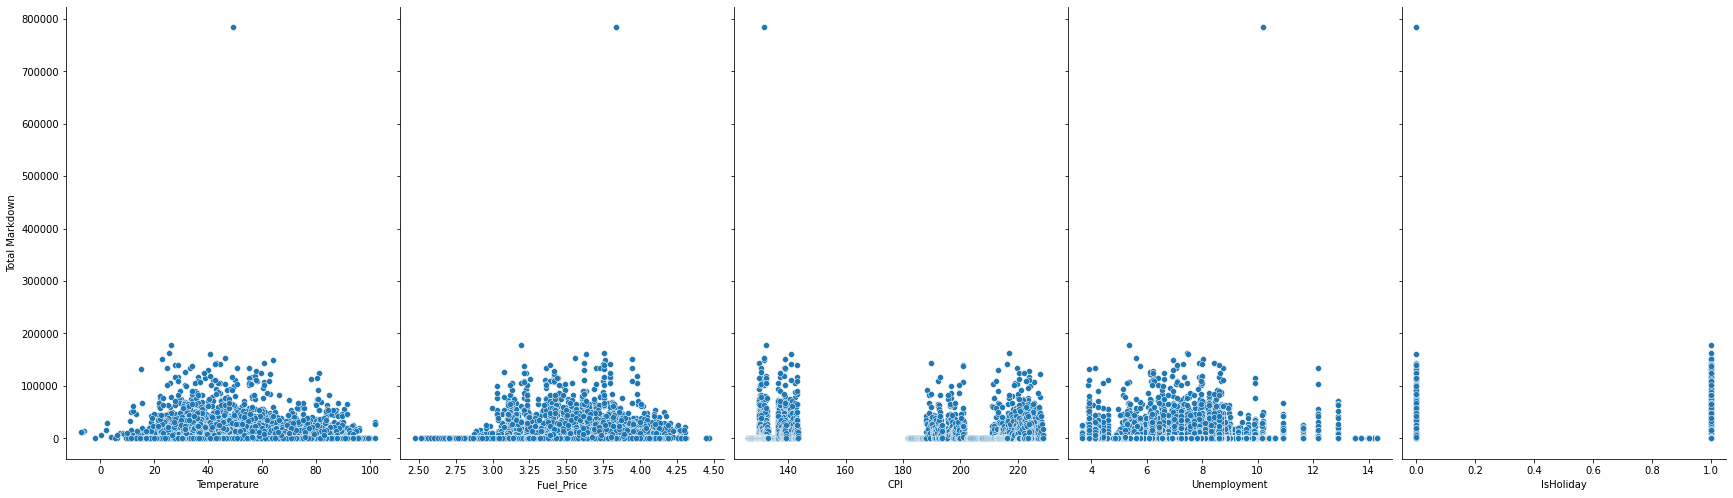

In [17]:
features_df.corr()

#x = features_df.iloc[:,3].values
#y=features_df.iloc[:,12].values

#Plotting the least square lines
sns.pairplot(features_df, x_vars=['Temperature','Fuel_Price','CPI','Unemployment', 'IsHoliday'], y_vars='Total Markdown', size=7, aspect=0.7)

Intercept:  [-16040.19791002]
Co-efficient: [[6877.4421593]]
Regression Score: 0.030898533318151844


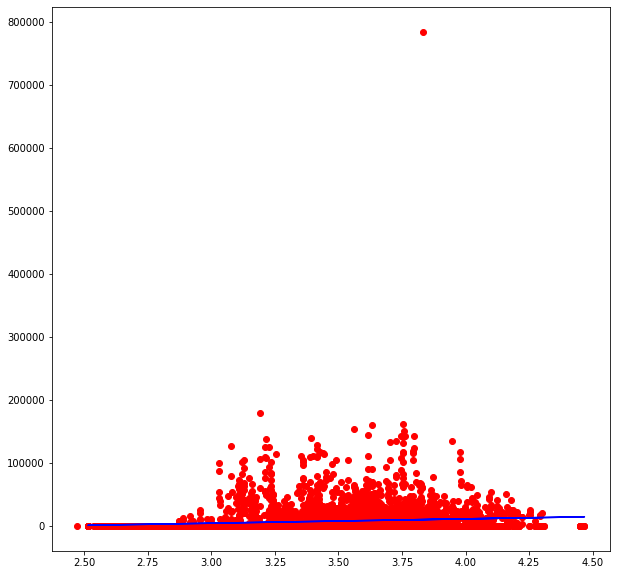

In [19]:
##Training Model

features_df["Total Markdown"] = features_df["Total Markdown"].fillna(0)
X = np.array(features_df['Fuel_Price']).reshape(-1, 1)

y = np.array(features_df['Total Markdown']).reshape(-1, 1)

# Separating the data into independent and dependent variables

# Converting each dataframe into a numpy array 

# since each dataframe contains only one column

#features_df.dropna(inplace = True)

# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

#To find the intercept
print("Intercept: ", regr.intercept_)

#To find the coefficient and the regression score
print("Co-efficient:", regr.coef_)
print("Regression Score:", regr.score(X_test, y_test))

y_pred = regr.predict(X_test)


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(X_train, y_train,color='r') 

plt.plot(X_test, y_pred,color='b') 

In [21]:
#Adding the Sales column to create a new dataframe to analyze co-relation between Markdowns and Sales

new_df = pd.merge(features_df, sales_df, on='Date', how='outer')

new_df["Total Markdown"] = new_df["MarkDown1"]+new_df["MarkDown2"]+new_df["MarkDown3"]+new_df["MarkDown4"]+new_df["MarkDown5"]
new_df["Total Markdown"] = new_df["Total Markdown"].fillna(0)
new_df.head()


,Store_x,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Total Markdown,Store_y,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0.0,1.0,1.0,24924.50,False
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0.0,1.0,2.0,50605.27,False
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0.0,1.0,3.0,13740.12,False
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0.0,1.0,4.0,39954.04,False
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0.0,1.0,5.0,32229.38,False
